In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from math import ceil  

df = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source(CSV).csv')

print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

<span style="font-size: 36px;">Task 1.1</span>

In [35]:

# Identify duplicated 'Bearer Id' values
duplicate_bearer_ids = df['Bearer Id'].value_counts()[df['Bearer Id'].value_counts() > 1]

duplicates_sample = df[df['Bearer Id'].isin(duplicate_bearer_ids.index)].head(10)
print("Sample of records with duplicated 'Bearer Id':\n", duplicates_sample)

duration_analysis = df[df['Bearer Id'].isin(duplicate_bearer_ids.index)]
duration_stats = duration_analysis.groupby('Bearer Id')['Dur. (ms)'].describe()
print("\nDuration analysis for each duplicated 'Bearer Id':\n", duration_stats)

aggregated_data = duration_analysis.groupby('Bearer Id').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
}).reset_index()

print("\nAggregated data for each duplicated 'Bearer Id':\n", aggregated_data.head())


Sample of records with duplicated 'Bearer Id':
        Bearer Id            Start  Start ms             End  End ms  \
20  1.304243e+19   4/17/2019 0:35     363.0  4/25/2019 4:52   691.0   
30  1.304243e+19   4/18/2019 0:35     711.0  4/25/2019 4:52   691.0   
43  1.304243e+19   4/19/2019 2:55     809.0  4/25/2019 0:17   262.0   
50  1.304243e+19   4/20/2019 2:55     691.0  4/25/2019 0:17   262.0   
58  7.277826e+18  4/20/2019 14:08     136.0  4/25/2019 0:54    79.0   
62  1.304243e+19   4/21/2019 2:55      73.0  4/25/2019 0:17   262.0   
63  1.304243e+19   4/21/2019 3:04     521.0  4/25/2019 4:02   116.0   
72  7.277826e+18  4/21/2019 13:57     724.0  4/25/2019 0:54    79.0   
82  1.304243e+19   4/22/2019 0:35     293.0  4/25/2019 0:35    30.0   
84  1.304243e+19   4/22/2019 1:17     301.0  4/25/2019 1:17   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
30   620248.

<span style="font-size: 30px;">Number of xDR sessions</span>

In [36]:

xdr_sessions_per_user = df.groupby('IMSI')['Bearer Id'].count().reset_index()
xdr_sessions_per_user.columns = ['IMSI', 'Number of xDR Sessions']

print("Number of xDR sessions per user:\n", xdr_sessions_per_user.head())


Number of xDR sessions per user:
            IMSI  Number of xDR Sessions
0  2.040471e+14                       1
1  2.040808e+14                       1
2  2.082001e+14                       1
3  2.082001e+14                       1
4  2.082001e+14                       2


<span style="font-size: 30px;">Session duration</span>

In [38]:
aggregated_data = df.groupby('Bearer Id')['Dur. (ms)'].sum().reset_index()

aggregated_data.columns = ['Bearer Id', 'Total Session Duration (ms)']

print("Aggregated session duration per user:\n", aggregated_data.head())

Aggregated session duration per user:
       Bearer Id  Total Session Duration (ms)
0  6.917538e+18                      24534.0
1  6.917538e+18                      21489.0
2  6.917538e+18                      27786.0
3  6.917538e+18                      15635.0
4  6.917538e+18                      24264.0


<span style="font-size: 30px;">The total download (DL) and upload (UL) data</span>

In [39]:
aggregated_data = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

aggregated_data.columns = ['Bearer Id', 'Total Download Data (Bytes)', 'Total Upload Data (Bytes)']

print("Aggregated total download and upload data per user:\n", aggregated_data.head())

Aggregated total download and upload data per user:
       Bearer Id  Total Download Data (Bytes)  Total Upload Data (Bytes)
0  6.917538e+18                  500721999.0                 41704610.0
1  6.917538e+18                  709549265.0                 38693596.0
2  6.917538e+18                  854465860.0                 15548926.0
3  6.917538e+18                  825786510.0                 49605688.0
4  6.917538e+18                  624957763.0                 21983463.0


<span style="font-size: 30px;">The total data volume (in Bytes) during this session for each application</span>

In [41]:
df['Total Data Volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Group by 'Bearer Id' to get the total data volume per user
aggregated_data = df.groupby('Bearer Id').agg({
    'Total Data Volume (Bytes)': 'sum',
 
}).reset_index()

print("Aggregated total data volume per user:\n", aggregated_data.head())

Aggregated total data volume per user:
       Bearer Id  Total Data Volume (Bytes)
0  6.917538e+18                542426609.0
1  6.917538e+18                748242861.0
2  6.917538e+18                870014786.0
3  6.917538e+18                875392198.0
4  6.917538e+18                646941226.0


<span style="font-size: 30px;">Task 1.2 </span>

In [49]:
df = pd.DataFrame({
    'duration_ms': np.random.normal(loc=5000, scale=1500, size=100),
    'social_media': np.random.normal(loc=2000, scale=500, size=100),
    'google': np.random.normal(loc=1500, scale=400, size=100),
    'email': np.random.normal(loc=1000, scale=300, size=100),
    'youtube': np.random.normal(loc=2500, scale=700, size=100),
    'netflix': np.random.normal(loc=3000, scale=800, size=100),
    'gaming': np.random.normal(loc=3500, scale=900, size=100),
    'total_data': np.random.normal(loc=50000, scale=15000, size=100),
    'other_data': np.random.normal(loc=10000, scale=3000, size=100),
})

# 1. Describe all relevant variables and associated data types
print("Data Types:\n", df.dtypes)

Data Types:
 duration_ms     float64
social_media    float64
google          float64
email           float64
youtube         float64
netflix         float64
gaming          float64
total_data      float64
other_data      float64
dtype: object


<span style="font-size: 30px;">Handle Missing Values and Outliers</span>

In [50]:
df.fillna(df.mean(), inplace=True)
for column in df.select_dtypes(include=[np.number]).columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    outliers = (df[column] > mean + 3 * std_dev) | (df[column] < mean - 3 * std_dev)
    df.loc[outliers, column] = mean


<span style="font-size: 30px;">Variable Transformations – Segment Users</span>

In [51]:
df['decile'] = pd.qcut(df['duration_ms'], 10, labels=False) + 1
decile_data = df.groupby('decile')['total_data'].sum().reset_index()
print("\nTotal Data per Decile Class:\n", decile_data)


Total Data per Decile Class:
    decile     total_data
0       1  518123.141542
1       2  460540.978206
2       3  454334.058248
3       4  376156.889158
4       5  589381.384649
5       6  467023.885392
6       7  478502.997486
7       8  510766.268290
8       9  542751.513220
9      10  455512.492165


<span style="font-size: 30px;">Analyze Basic Metrics</span>

In [52]:
basic_metrics = df.describe()
print("\nBasic Metrics:\n", basic_metrics)


Basic Metrics:
        duration_ms  social_media       google        email      youtube  \
count   100.000000    100.000000   100.000000   100.000000   100.000000   
mean   4976.133317   1972.265037  1514.499950   963.341381  2382.680729   
std    1540.120125    450.966051   386.517578   288.671567   677.172158   
min     889.186178    832.515076   479.394492   152.861716   731.393620   
25%    3959.695212   1657.243004  1271.523609   780.396375  1921.068040   
50%    5041.680114   1913.143489  1518.742602  1007.680400  2359.699464   
75%    6182.220371   2288.918267  1755.025482  1119.446980  2853.209723   
max    8398.728848   3206.901002  2683.796333  1677.368657  4042.534099   

           netflix       gaming    total_data    other_data      decile  
count   100.000000   100.000000    100.000000    100.000000  100.000000  
mean   2913.484363  3456.443893  48530.936084   9987.323547    5.500000  
std     962.861578   956.503693  17527.193977   3011.681698    2.886751  
min     867

<span style="font-size: 30px;">Non-Graphical Univariate Analysis</span>

In [53]:
univariate_analysis = df.describe(include=[np.number])
print("\nUnivariate Analysis:\n", univariate_analysis)


Univariate Analysis:
        duration_ms  social_media       google        email      youtube  \
count   100.000000    100.000000   100.000000   100.000000   100.000000   
mean   4976.133317   1972.265037  1514.499950   963.341381  2382.680729   
std    1540.120125    450.966051   386.517578   288.671567   677.172158   
min     889.186178    832.515076   479.394492   152.861716   731.393620   
25%    3959.695212   1657.243004  1271.523609   780.396375  1921.068040   
50%    5041.680114   1913.143489  1518.742602  1007.680400  2359.699464   
75%    6182.220371   2288.918267  1755.025482  1119.446980  2853.209723   
max    8398.728848   3206.901002  2683.796333  1677.368657  4042.534099   

           netflix       gaming    total_data    other_data      decile  
count   100.000000   100.000000    100.000000    100.000000  100.000000  
mean   2913.484363  3456.443893  48530.936084   9987.323547    5.500000  
std     962.861578   956.503693  17527.193977   3011.681698    2.886751  
min  

<span style="font-size: 30px;">Graphical Univariate Analysis</span>

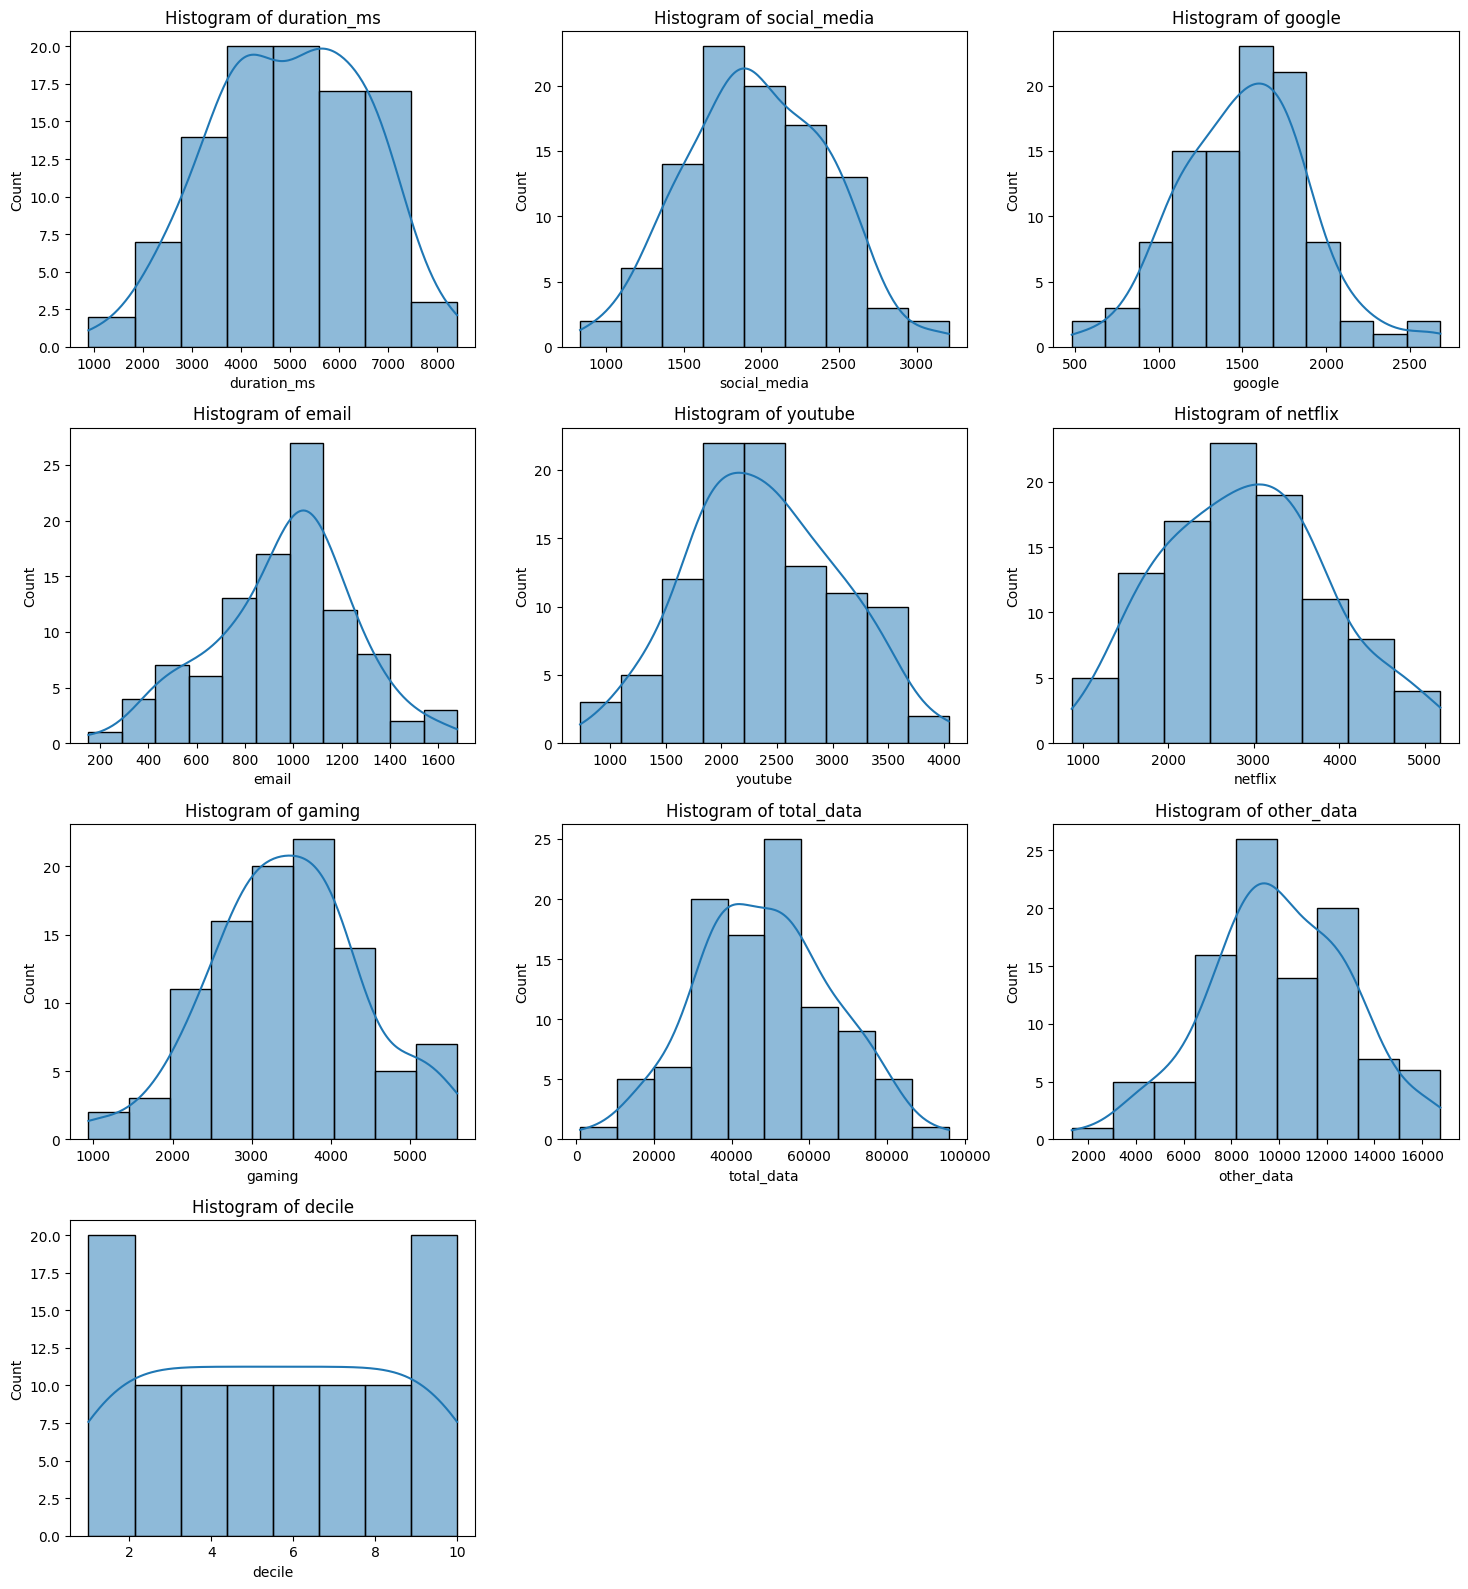

In [54]:
num_vars = len(df.select_dtypes(include=[np.number]).columns)

cols = 3
rows = ceil(num_vars / cols)

plt.figure(figsize=(cols * 5, rows * 4))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


<span style="font-size: 30px;">Bivariate Analysis</span>

<Figure size 1200x600 with 0 Axes>

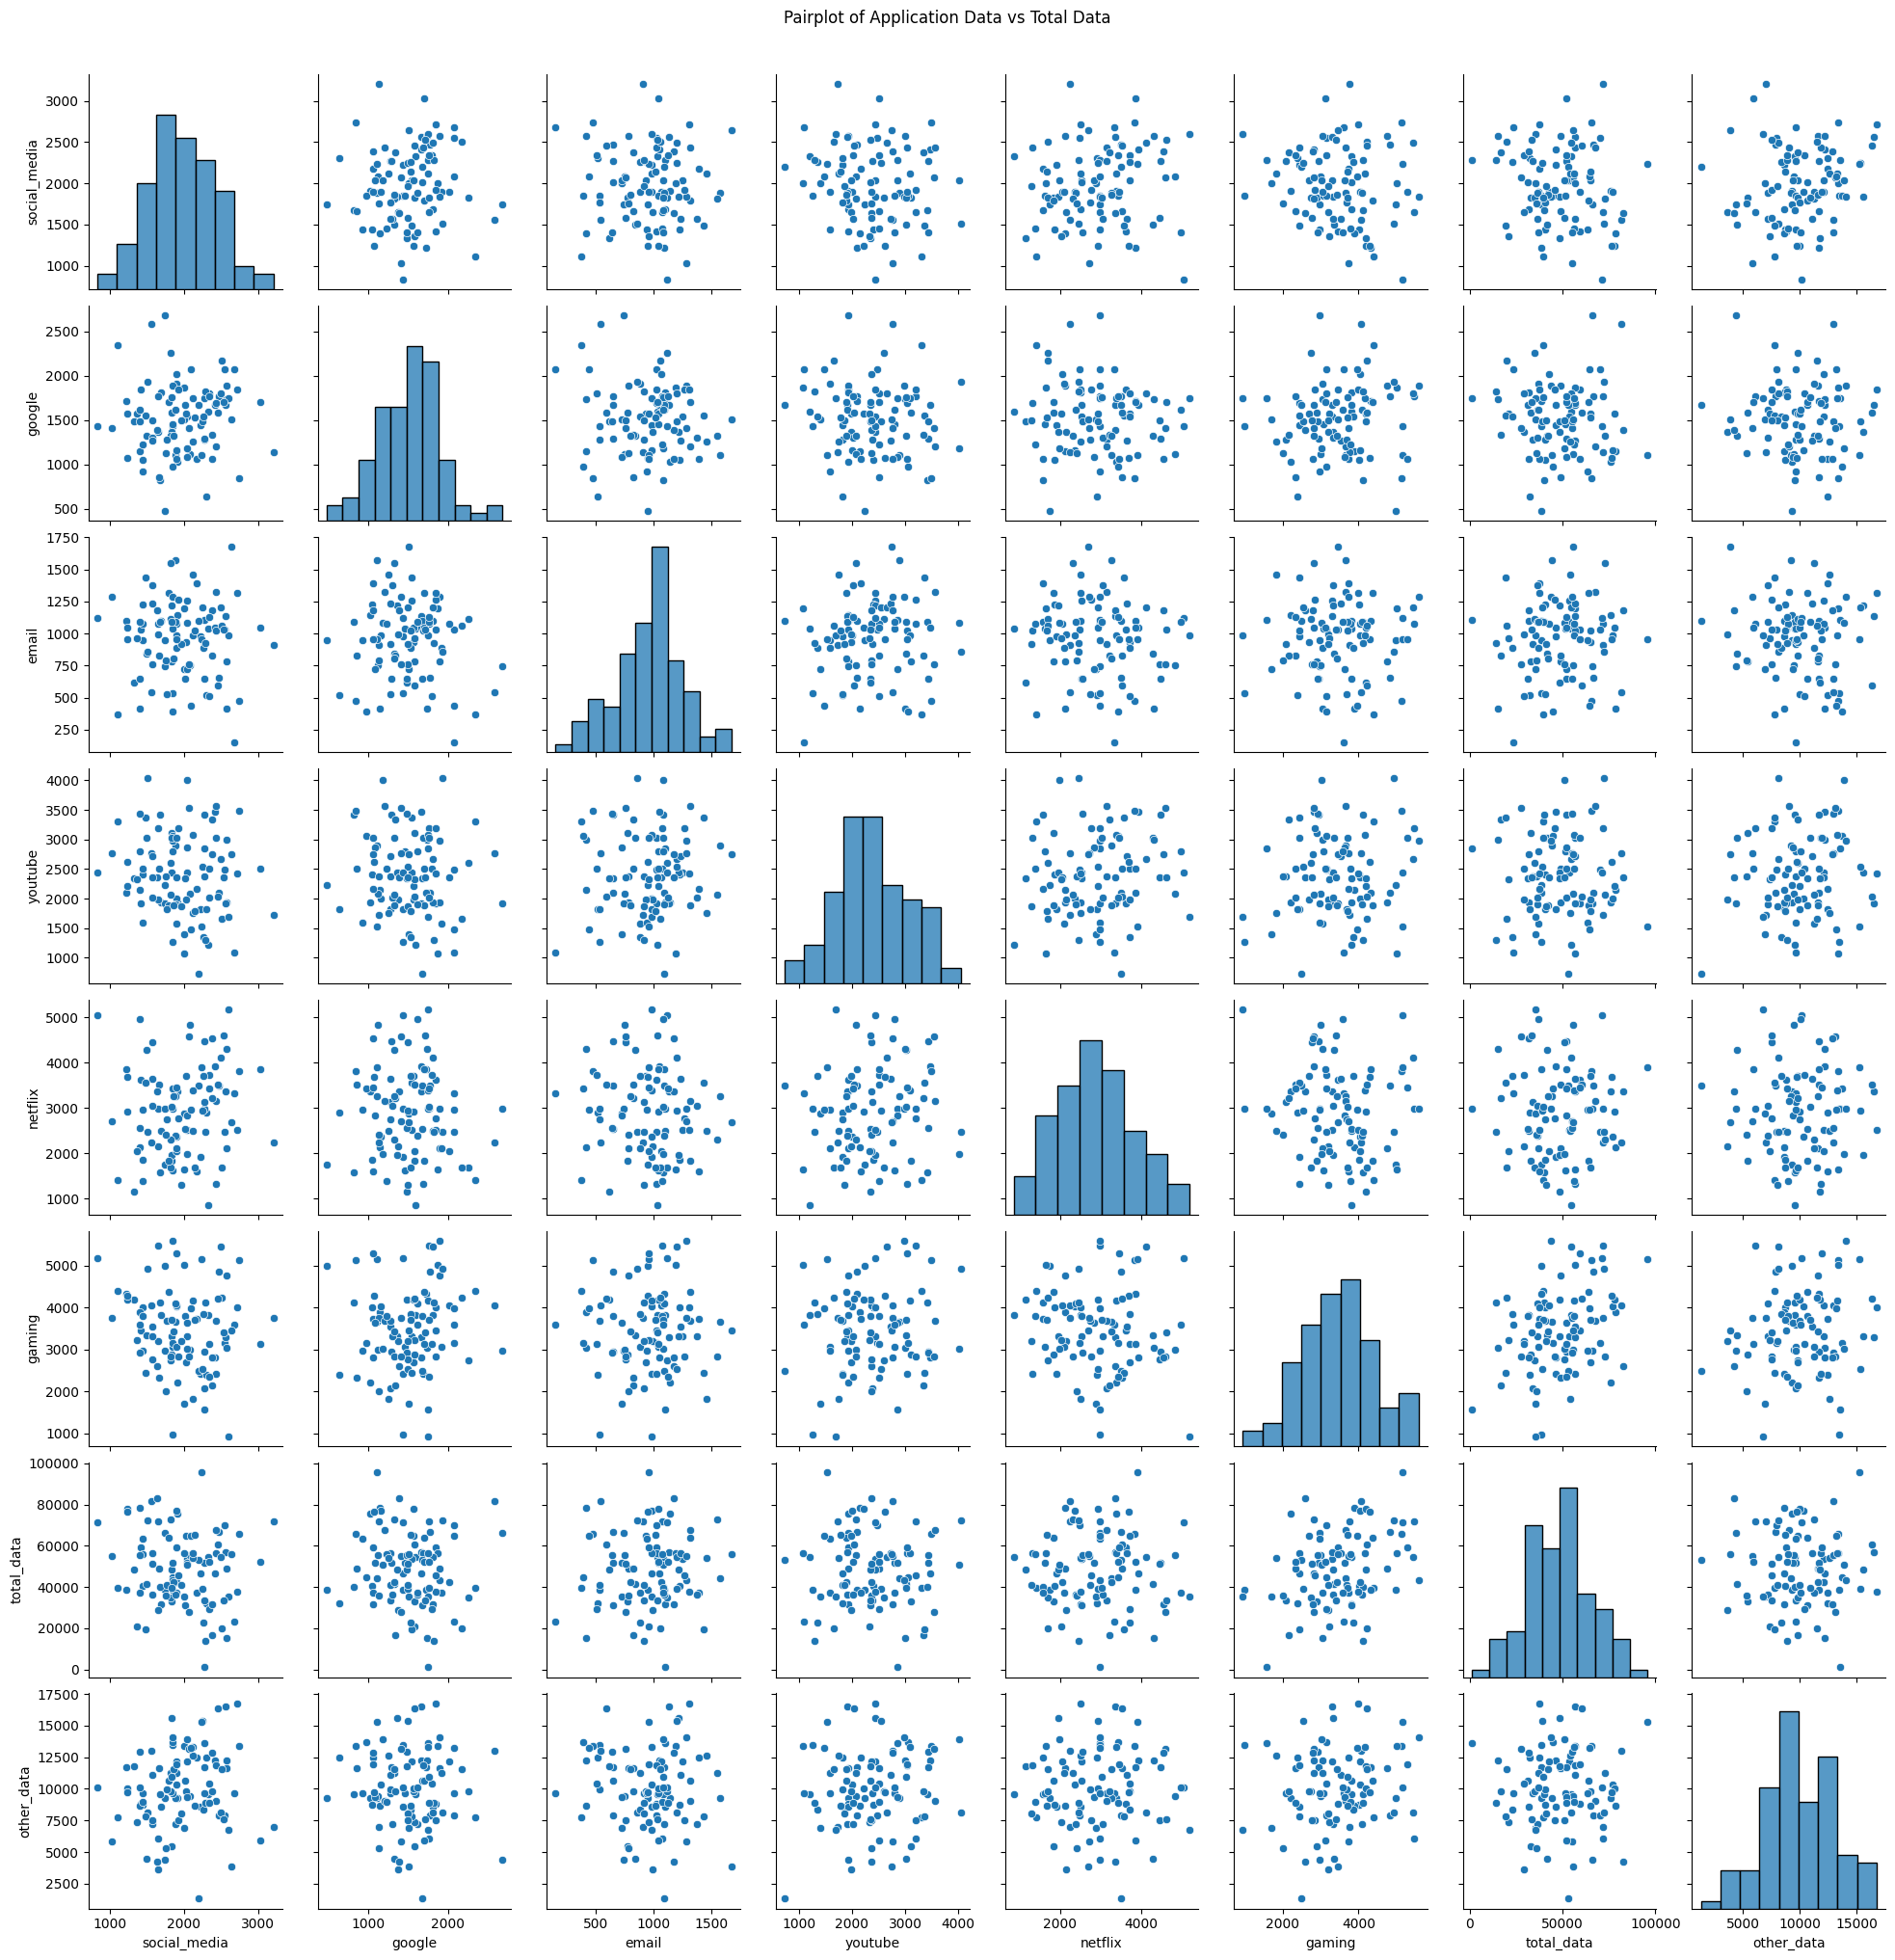

In [55]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_data', 'other_data']])
plt.suptitle('Pairplot of Application Data vs Total Data', y=1.02)
plt.show()

<span style="font-size: 30px;">Correlation Analysis</span>

In [56]:
correlation_matrix = df[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other_data', 'total_data']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
               social_media    google     email   youtube   netflix    gaming  \
social_media      1.000000  0.076927 -0.040373 -0.144329  0.119707 -0.143283   
google            0.076927  1.000000 -0.080961 -0.097834 -0.083315  0.089476   
email            -0.040373 -0.080961  1.000000  0.064134 -0.098793  0.006526   
youtube          -0.144329 -0.097834  0.064134  1.000000  0.121915  0.095686   
netflix           0.119707 -0.083315 -0.098793  0.121915  1.000000 -0.123067   
gaming           -0.143283  0.089476  0.006526  0.095686 -0.123067  1.000000   
other_data        0.162195 -0.066123 -0.095425  0.106091 -0.001610  0.126469   
total_data       -0.142304 -0.083633  0.073513 -0.014274 -0.001450  0.329949   

              other_data  total_data  
social_media    0.162195   -0.142304  
google         -0.066123   -0.083633  
email          -0.095425    0.073513  
youtube         0.106091   -0.014274  
netflix        -0.001610   -0.001450  
gaming          0.12646

<span style="font-size: 30px;"> Dimensionality Reduction</span>

In [57]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other_data', 'total_data']])
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("\nPrincipal Component Analysis Results:")
print(f"Explained Variance Ratio: {explained_variance}")

# Interpretation
print("\nPCA Interpretation:")
print("1. PC1 explains {:.2f}% of the variance.".format(explained_variance[0] * 100))
print("2. PC2 explains {:.2f}% of the variance.".format(explained_variance[1] * 100))
print("3. The combination of PC1 and PC2 explains {:.2f}% of the total variance.".format(sum(explained_variance) * 100))
print("4. PCA can help in reducing dimensionality while retaining most of the variance in the data.")



Principal Component Analysis Results:
Explained Variance Ratio: [0.96332031 0.02852164]

PCA Interpretation:
1. PC1 explains 96.33% of the variance.
2. PC2 explains 2.85% of the variance.
3. The combination of PC1 and PC2 explains 99.18% of the total variance.
4. PCA can help in reducing dimensionality while retaining most of the variance in the data.
